# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    return ((x**2) * numpy.sin(x));

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    return (((2*x*numpy.sin(x))-(x**2 -2)*numpy.cos(x))-2);

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin);

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [12]:
def integrate_numeric(xmin, xmax, N):
    dx = (xmax-xmin)/N
    if N==1:
        S=0
        for i in range (0, N):
            f2= (xmax+xmin)/2
            S += (f(xmin)+f(xmax)+4*f(f2))
        S = (dx/6)* S
    else:
        x = numpy.linspace(xmin,xmax,N+1)
        y=f(x)
        S = dx/3 * numpy.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Make sure you have implemented Simpson's rule correctly:

In [13]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [14]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


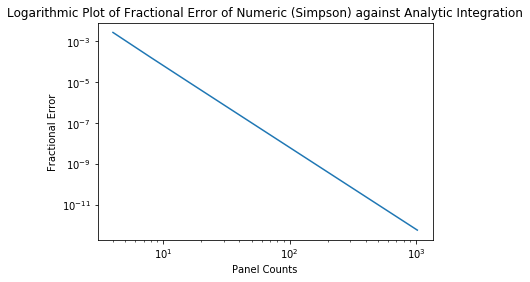

In [16]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
all_numeric_results=[]
for i in range (0 , len(panel_counts)):
    all_numeric_results.append(integrate_numeric(x0,x1,panel_counts[i]))
fract_error = ((result_analytic-all_numeric_results)/result_analytic)
plt.yscale('log')
plt.xscale('log')
plt.plot(panel_counts, fract_error)
plt.xlabel("Panel Counts")
plt.ylabel("Fractional Error")
plt.title("Logarithmic Plot of Fractional Error of Numeric (Simpson) against Analytic Integration")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As you increase the number of panels used, the fractional error reduces and hence the accuracy would improve. This is because as you take thinner and thinner slices, you would produce a better approximation of the gradient and hence the area under any given point.

However, in practice, beyond certain number of points, the accuracy may decrease as you produce numerical round off issues in the approximation, beyond around the 10^3 panels mark. Additionally, if the function being integrated is not of high order or is not a smooth function, further errors in the numerical method may grow. Decreasing accuracy for large N.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule's accuracy would exhibit the same logarithmic relation with panel count as the Simpson Rule (as shown above). However, because the Trapezium rule is a weaker approximation of smooth, curving functions, it has a generally higher integration error. The error scales with N^-2, where N is panel count.

However, at larger panel counts, there are fewer numerical rounding issues, partly due to fewer data points being considered. Consequently, at large N, the trapezium rule is a more accurate approximation of higher order functions than the Simpson rule.